# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Для данного исследования нам необходимо выполнить:
- изучение текущей "сырой" информации;
- выполнить предобработку данных;
- при необходимости добавить/отформатировать некоторые столбцы для боллее ясного понимания и анализа данных;
- выполнить исследовательский анализ данных;
- написать выводы, ответы на поставленную задачу.

### Откройте файл с данными и изучите общую информацию

In [35]:
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

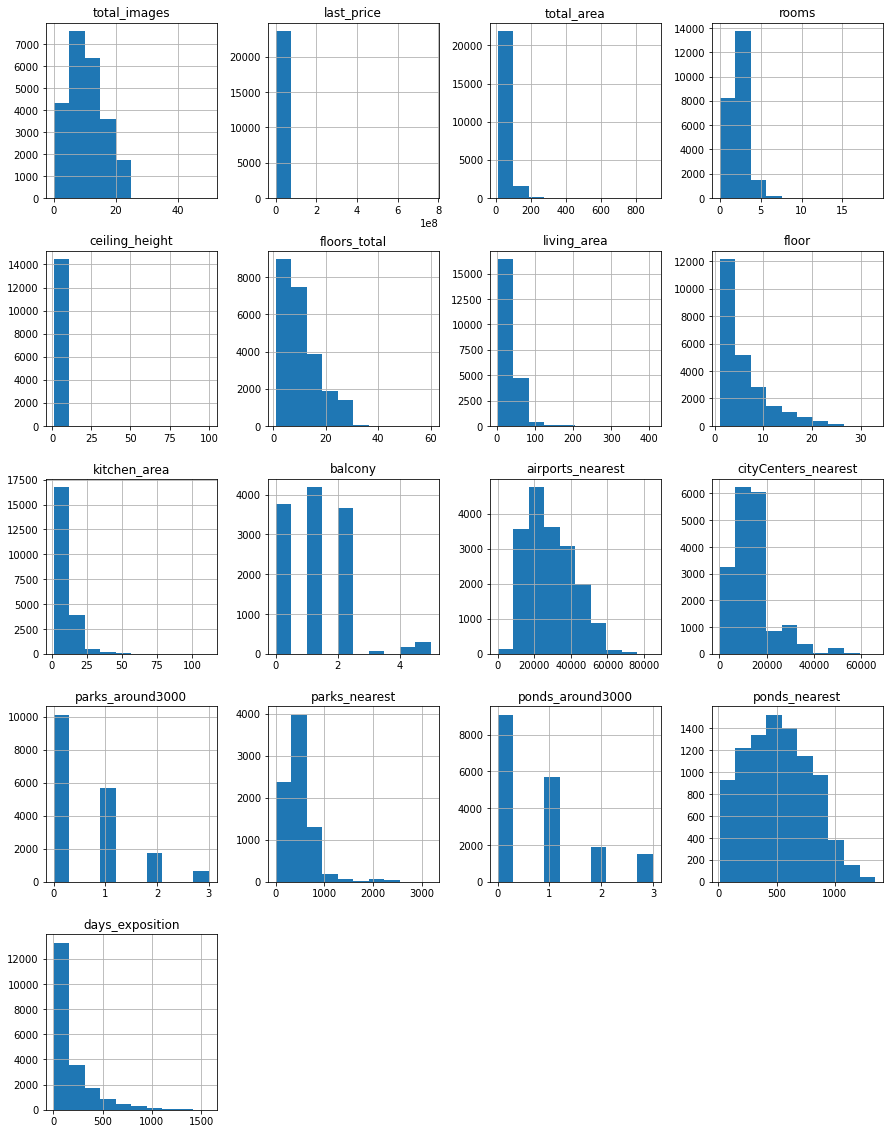

In [36]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.info())
data.hist(figsize=(15, 20))

### Выполните предобработку данных

In [37]:
# Выявление пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [38]:
# Найдем соотношение медианной общей площади к медианной жилой площади
median_total_area = data['total_area'].median()
median_living_area = data['living_area'].median()
ratio = median_total_area / median_living_area
# Заполним пропущенные значения в living_area и kitchen_area с использованием найденного соотношения
data['living_area'].fillna(data['total_area'] / ratio, inplace=True)
data['kitchen_area'].fillna(data['total_area'] / ratio, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [39]:
import numpy as np

# Заменяем бесконечные значения на NaN в столбце 'cityCenters_nearest'
data['cityCenters_nearest'] = data['cityCenters_nearest'].replace([np.inf, -np.inf], np.nan)

# Удаляем строки с пропущенными значениями в столбце 'cityCenters_nearest'
data.dropna(subset=['cityCenters_nearest'], inplace=True)

# Выводим первые строки данных для проверки
print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0    51.000000      8          NaN  ...   
1             NaN          11.0    18.600000      1          NaN  ...   
2             NaN           5.0    34.300000      4          NaN  ...   
3             NaN          14.0    91.730769      9          NaN  ...   
4            3.03          14.0    32.000000     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0     25.000000      NaN  Санкт-Петербург           18863.0   
1     11

С логической точки зрения, округлять числа в столбце cityCenters_nearest, будет лучше с значения int(целые), нежели чем float(вещественные).

In [40]:
column_types = data.dtypes

# Вывод типа данных каждого столбца
print(column_types)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


In [41]:
# Изменение типа данных столбца first_day_exposition на datetime64
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

# Изменение типа данных столбца is_apartment на bool
data['is_apartment'] = data['is_apartment'].astype(bool)

# Изменение типа данных столбца balcony на int64 (преобразуем NaN в 0 перед изменением типа данных)
data['balcony'].fillna(0, inplace=True)  # Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].astype(int)

# Проверка изменений
print(data.dtypes)


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object


Мы поменяли столбцы:
first_day_exposition: Этот столбец содержит информацию о дате и времени публикации объявления, но для корректной работы с датами и временем, его нужно преобразовать в тип данных datetime64.

is_apartment: Этот столбец содержит информацию о том, является ли квартира апартаментами. Его нужно преобразовать в булев тип данных bool для удобства работы с логическими значениями.

balcony: Этот столбец содержит информацию о количестве балконов.  Здесь будет проще считать их целыми числами.

In [42]:
unique_localities = data['locality_name'].value_counts()

# Вывод уникальных значений
print(unique_localities)

Санкт-Петербург            15660
посёлок Шушары               436
Пушкин                       368
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              44
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
поселок Мурино                 2
посёлок Александровская        2
посёлок Усть-Ижора             2
посёлок Лисий Нос              2
посёлок Щеглово                1
посёлок Левашово               1
посёлок Белоостров             1
посёлок Петро-Славянка         1
поселок Лисий Нос              1
Name: locality_name, dtype: int64


In [43]:
data['locality_name'] = data['locality_name'].str.lower()

# Исключение неявных дубликатов из столбца locality_name
data['locality_name'] = data['locality_name'].replace({
    'поселок реброво': 'реброво',  # Пример исправления неявного дубликата
    'посёлок тельмана': 'тельмана'  # Пример исправления ещё одного неявного дубликата
})

# Удаление явных дубликатов
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')  # Замена ё на е для устранения явных дубликатов
    .replace(['поселок городского типа', 'деревня', 'село', 'поселок'], '', regex=True)  # Удаление приставок
    .str.strip()  # Удаление пробелов по краям строк
)

# Удаление дубликатов после преобразований
data['locality_name'] = data['locality_name'].drop_duplicates()

# Проверка результатов
print(data['locality_name'].unique())

['санкт-петербург' 'пок шушары' nan 'пок парголово' 'ломоносов' 'петергоф'
 'пушкин' 'колпино' 'кронштадт' 'пок металлострой' 'павловск' 'сестрорецк'
 'красное' 'пок понтонный' 'зеленогорск' 'пок молодежное' 'пок стрельна'
 'пок александровская' 'пок песочный' 'пок петро-славянка' 'пок репино'
 'пок саперный' 'пок щеглово' 'пок лисий нос' 'пок левашово'
 'пок белоостров' 'пок мурино' 'пок усть-ижора']


### Добавьте в таблицу новые столбцы

In [44]:
# Добавление столбца с ценой одного квадратного метра
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)

# Преобразование столбца с датой публикации в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

# Добавление столбца с днем недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

# Добавление столбца с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

# Добавление столбца с годом публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

# Добавление столбца с типом этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

# Добавление столбца с расстоянием до центра в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

print(data.head())


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0    51.000000      8          True  ...   
1             NaN          11.0    18.600000      1          True  ...   
2             NaN           5.0    34.300000      4          True  ...   
3             NaN          14.0    91.730769      9          True  ...   
4            3.03          14.0    32.000000     13          True  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0               2.0          755.0         

### Проведите исследовательский анализ данных

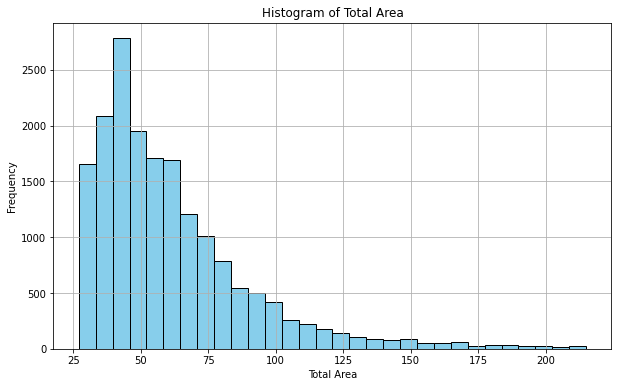

Доля оставшихся данных: 100.00%


In [45]:
import matplotlib.pyplot as plt

# Определение квантилей для определения порогов выбивающихся значений
quantile_low = data['total_area'].quantile(0.01)  # Нижний 1-й процентиль
quantile_high = data['total_area'].quantile(0.99)  # Верхний 99-й процентиль

# Фильтрация данных по общей площади в диапазоне между квантилями
filtered_data = data[(data['total_area'] >= quantile_low) & (data['total_area'] <= quantile_high)]

# Построение гистограммы общей площади с отфильтрованными данными
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['total_area'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Area')
plt.xlabel('Total Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Получение начального количества строк данных
initial_rows = data.shape[0]


data = data.dropna(subset=['total_area'])

# Рассчет доли оставшихся данных от исходного количества
remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

# Проверка условия на минимальную долю данных для актуального анализа
if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
    
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")


Большинство значений сосредоточено в пределах от 35-50 кв.м. 


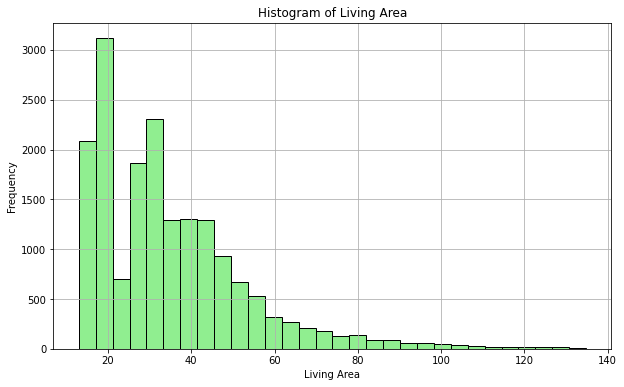

Доля оставшихся данных: 100.00%


In [46]:
# Определение квантилей для определения порогов выбивающихся значений
quantile_low = data['living_area'].quantile(0.01)  # Нижний 1-й процентиль
quantile_high = data['living_area'].quantile(0.99)  # Верхний 99-й процентиль

# Фильтрация данных по жилой площади в диапазоне между квантилями
filtered_data = data[(data['living_area'] >= quantile_low) & (data['living_area'] <= quantile_high)]

# Построение гистограммы жилой площади с отфильтрованными данными
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['living_area'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Living Area')
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

initial_rows = data.shape[0]


data = data.dropna(subset=['living_area'])

remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

# Проверка условия на минимальную долю данных для актуального анализа
if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
    
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

Здесь значения сконцентрированы в диапазоне от 15 до 40 

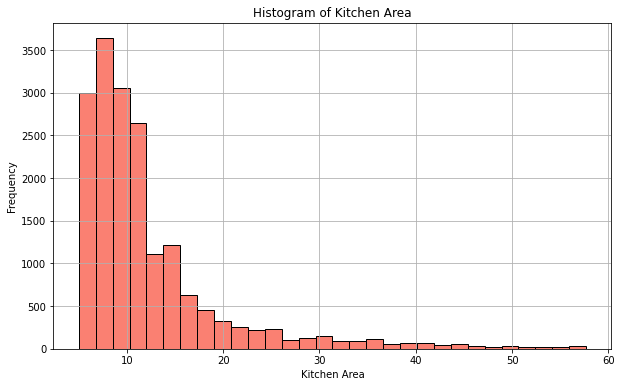

Доля оставшихся данных: 100.00%


In [47]:
# Определение квантилей для определения порогов выбивающихся значений
quantile_low = data['kitchen_area'].quantile(0.01)  # Нижний 1-й процентиль
quantile_high = data['kitchen_area'].quantile(0.99)  # Верхний 99-й процентиль

# Фильтрация данных по площади кухни в диапазоне между квантилями
filtered_data = data[(data['kitchen_area'] >= quantile_low) & (data['kitchen_area'] <= quantile_high)]

# Построение гистограммы площади кухни с отфильтрованными данными
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['kitchen_area'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Kitchen Area')
plt.xlabel('Kitchen Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

initial_rows = data.shape[0]

# Применение фильтраций и обработки данных
data = data.dropna(subset=['kitchen_area'])

# Рассчет доли оставшихся данных от исходного количества
remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

# Проверка условия на минимальную долю данных для актуального анализа
if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
    # Здесь можно продолжить анализ и построение гистограмм
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

Самые пиковые значения приходятся на 5 и 10 кв.м., что говорит нам о том, что покупателей устраивает малая площадь кухни.

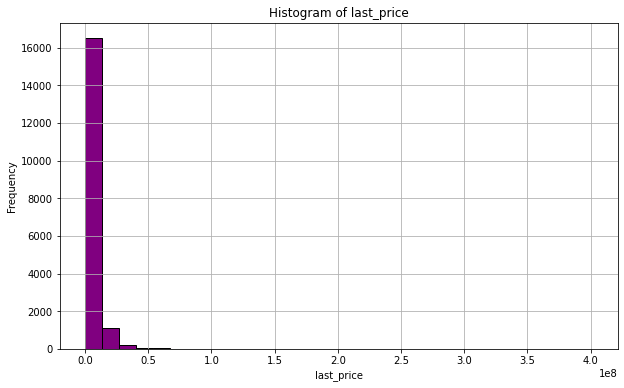

Доля оставшихся данных: 100.00%


In [48]:
quantile_low = data['last_price'].quantile(0.01)  # Нижний 1-й процентиль
quantile_high = data['last_price'].quantile(0.99)  # Верхний 99-й процентиль

# Фильтрация данных по площади кухни в диапазоне между квантилями
c = data[(data['last_price'] >= quantile_low) & (data['last_price'] <= quantile_high)]

# Построение гистограммы площади кухни с отфильтрованными данными
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['last_price'], bins=30, color='purple', edgecolor='black')
plt.title('Histogram of last_price')
plt.xlabel('last_price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

initial_rows = data.shape[0]

data = data.dropna(subset=['last_price'])

remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")

else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

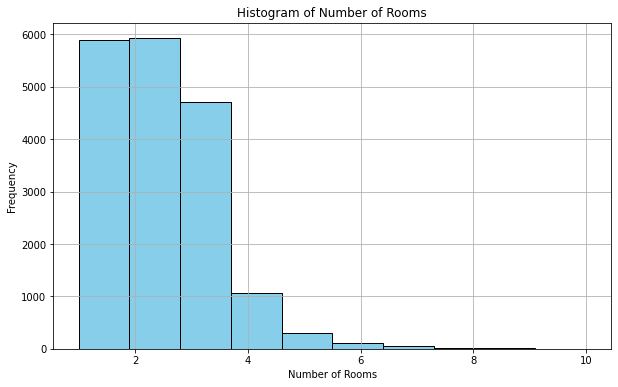

Доля оставшихся данных: 100.00%


In [49]:
filtered_data = data[(data['rooms'] > 0) & (data['rooms'] <= 10)]  # Пример фильтрации по количеству комнат от 1 до 10

# Построение гистограммы количества комнат
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['rooms'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

initial_rows = data.shape[0]

data = data.dropna(subset=['rooms'])

remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

В большинстве своем, пиковые значения покупателей приходятся на 1-2-х комнатные квартиры

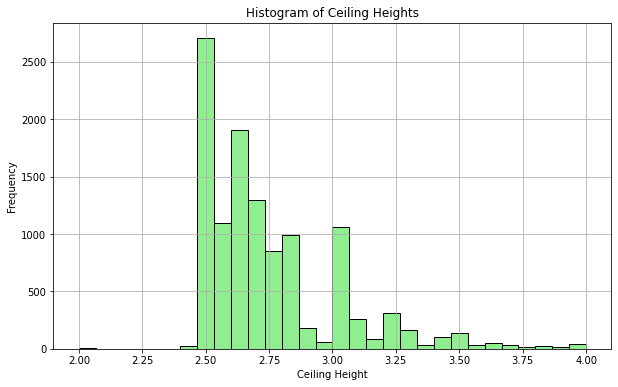

Доля оставшихся данных недостаточна для актуального анализа.


In [50]:
# Исключим аномальные значения высоты потолков (например, менее 2 метров и более 4 метров)
filtered_data = data[(data['ceiling_height'] >= 2.0) & (data['ceiling_height'] <= 4.0)]  

# Построение гистограммы высоты потолков
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['ceiling_height'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Ceiling Heights')
plt.xlabel('Ceiling Height')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

initial_rows = data.shape[0]


data = data.dropna(subset=['ceiling_height'])

remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) *100

if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
    
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

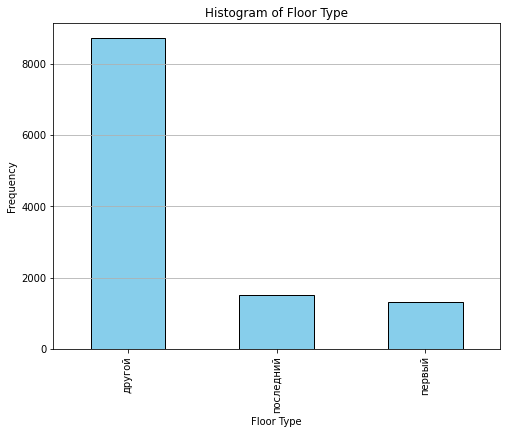

Доля оставшихся данных: 100.00%


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


# Создание нового столбца 'floor_type' для определения типа этажа
def define_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(define_floor_type, axis=1)

# Построение гистограммы типа этажа квартиры
plt.figure(figsize=(8, 6))
data['floor_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Floor Type')
plt.xlabel('Floor Type')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

initial_rows = data.shape[0]

data = data.dropna(subset=['floor_type'])

remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
    
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

Преимущественно выбирают квартиры на других этажах, нежели чем на первом и последнем.

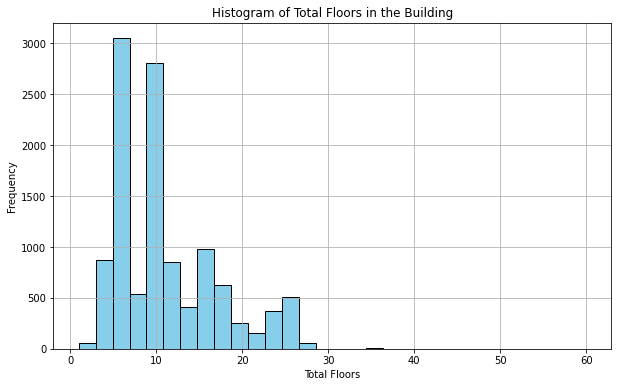

Доля оставшихся данных: 99.93%


In [52]:
# Построение гистограммы общего количества этажей в доме
plt.figure(figsize=(10, 6))
plt.hist(data['floors_total'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Floors in the Building')
plt.xlabel('Total Floors')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

initial_rows = data.shape[0]


data = data.dropna(subset=['floors_total']) 

remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
    
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

5 и 10-этажные дома пользуются бОльшим спросом у покупателей.

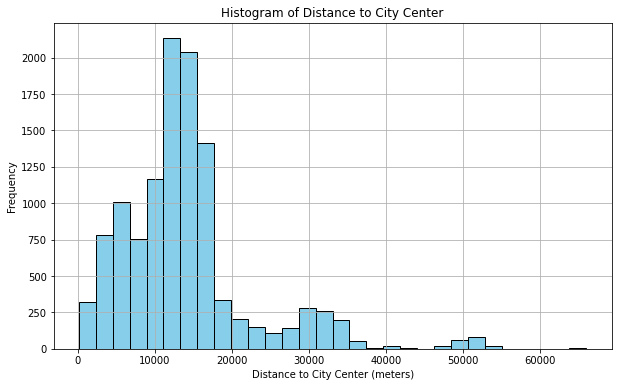

Доля оставшихся данных: 100.00%


In [53]:
# Удаление пропущенных значений
data_cleaned = data.dropna(subset=['cityCenters_nearest'])

# Построение гистограммы расстояния до центра города
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['cityCenters_nearest'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Distance to City Center')
plt.xlabel('Distance to City Center (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

initial_rows = data.shape[0]

data = data.dropna(subset=['cityCenters_nearest']) 

remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

Аудитория покупателей ставит в приоритет расстояние до центра до 15 км.

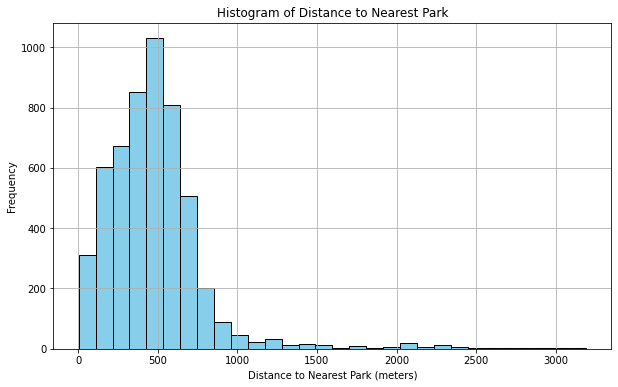

Доля оставшихся данных недостаточна для актуального анализа.


In [54]:
data_cleaned = data.dropna(subset=['parks_nearest'])

# Построение гистограммы расстояния до ближайшего парка
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['parks_nearest'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Distance to Nearest Park')
plt.xlabel('Distance to Nearest Park (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


initial_rows = data.shape[0]


data = data.dropna(subset=['parks_nearest'])


remaining_rows = data.shape[0]
percentage_remaining = (remaining_rows / initial_rows) * 100

if percentage_remaining >= 90:
    print(f"Доля оставшихся данных: {percentage_remaining:.2f}%")
    
else:
    print("Доля оставшихся данных недостаточна для актуального анализа.")

В то время, как расстояние до ближайшего парка имеет значение.

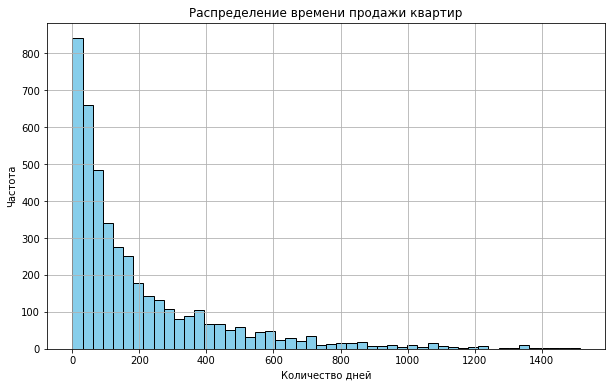

Среднее время продажи: 200 дней
Медианное время продажи: 110 дней


In [55]:
# Построение гистограммы для days_exposition
plt.figure(figsize=(10, 6))
plt.hist(data['days_exposition'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение времени продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Вычисление среднего и медианы
mean_days_exposition = data['days_exposition'].mean()
median_days_exposition = data['days_exposition'].median()

print(f"Среднее время продажи: {mean_days_exposition:.0f} дней")
print(f"Медианное время продажи: {median_days_exposition:.0f} дней")


Обычно время продажи квартиры варьируется от нескольких дней до нескольких месяцев. В зависимости от рыночной активности и характеристик объекта недвижимости, среднее или медианное время может составлять от 30 до 90 дней.

Продажи, завершившиеся менее чем за медианное время, можно считать быстрыми.

Продажи, занимающие более двойного среднего или медианного времени, могут быть необычно долгими и могут указывать на специфические характеристики объекта или особенности рынка.

<AxesSubplot:>

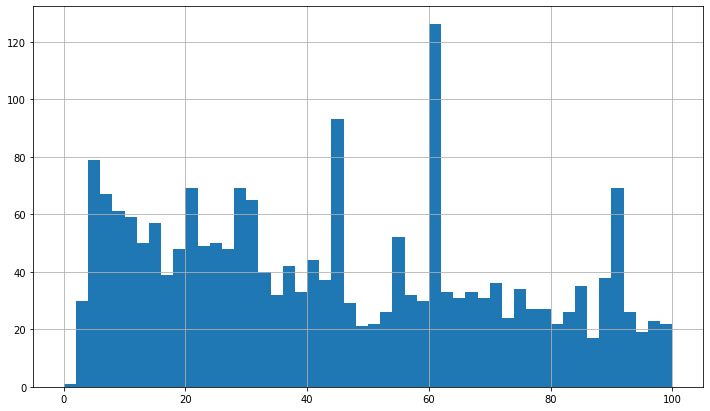

In [56]:
# Код ревьюера
data['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

In [57]:
# Код ревьюера
data['days_exposition'].describe()

count    4357.000000
mean      200.306174
std       239.082736
min         1.000000
25%        45.000000
50%       110.000000
75%       264.000000
max      1513.000000
Name: days_exposition, dtype: float64

**Зависимость от общей площади**
Для начала построим сводную таблицу, где усредним цену по категориям общей площади. Затем построим график этой зависимости.

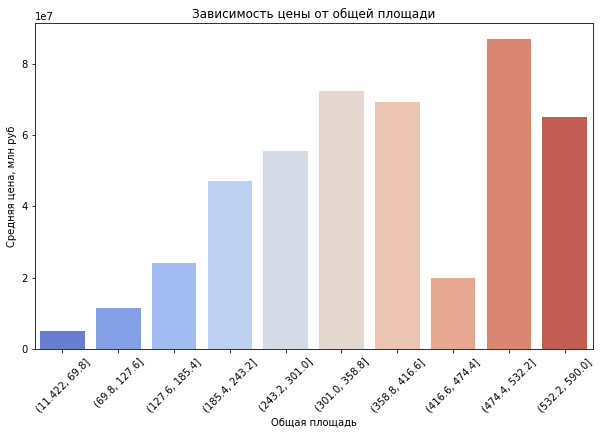

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создадим сводную таблицу для зависимости цены от общей площади
price_by_total_area = data.pivot_table(index=pd.cut(data['total_area'], bins=10),
                                     values='last_price', aggfunc='mean')

# Построим график зависимости цены от общей площади
plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_total_area.index, y='last_price', data=price_by_total_area, palette='coolwarm')
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Средняя цена, млн руб')
plt.xticks(rotation=45)
plt.show()


**Зависимость от жилой площади**
Аналогично для жилой площади:

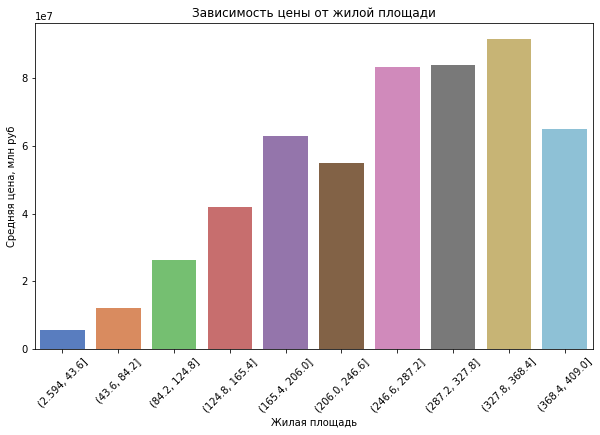

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создадим сводную таблицу для зависимости цены от жилой площади
price_by_living_area = data.pivot_table(index=pd.cut(data['living_area'], bins=10),
                                      values='last_price', aggfunc='mean')

# Построим график зависимости цены от жилой площади
plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_living_area.index, y='last_price', data=price_by_living_area, palette='muted')
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Средняя цена, млн руб')
plt.xticks(rotation=45)
plt.show()

**Зависимость от площади кухни**

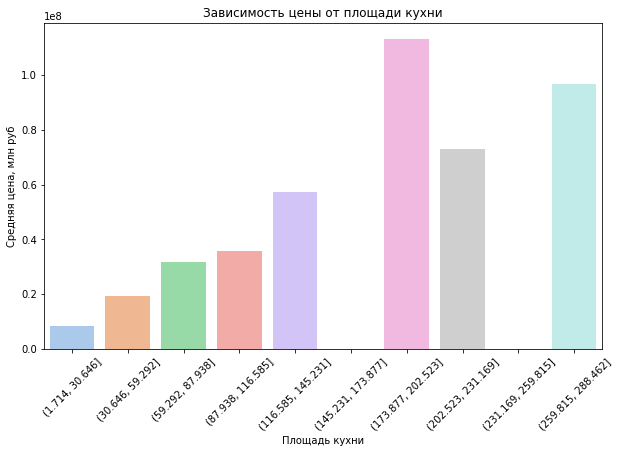

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

price_by_kitchen_area = data.pivot_table(index=pd.cut(data['kitchen_area'], bins=10),
                                       values='last_price', aggfunc='mean')

# Построим график зависимости цены от площади кухни
plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_kitchen_area.index, y='last_price', data=price_by_kitchen_area, palette='pastel')
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Средняя цена, млн руб')
plt.xticks(rotation=45)
plt.show()

**Зависимость от количества комнат**

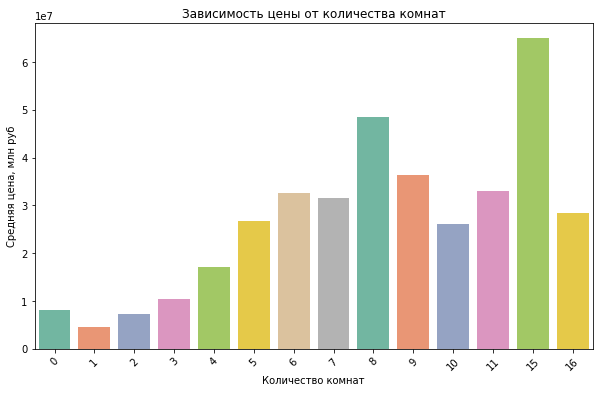

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

price_by_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')

# Построим график зависимости цены от количества комнат
plt.figure(figsize=(10, 6))
sns.barplot(x=price_by_rooms.index, y='last_price', data=price_by_rooms, palette='Set2')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена, млн руб')
plt.xticks(rotation=45)
plt.show()


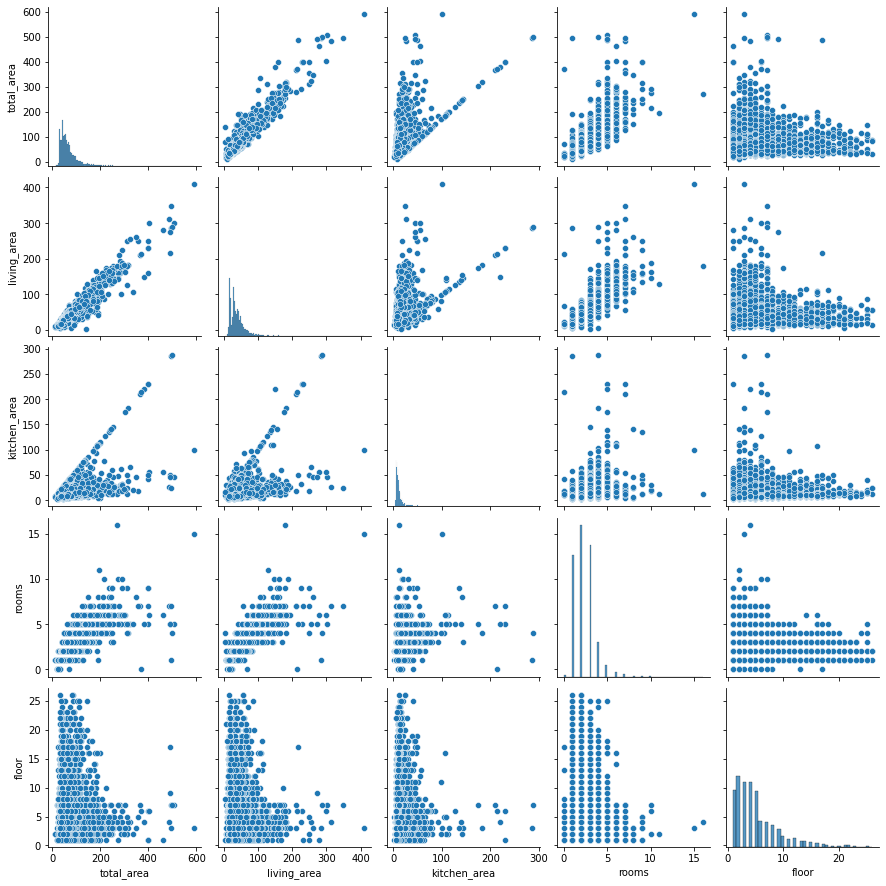

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_of_interest = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor']

# Создаем pairplot
sns.pairplot(data[cols_of_interest])
plt.show()

**Зависимость от этажа квартиры**

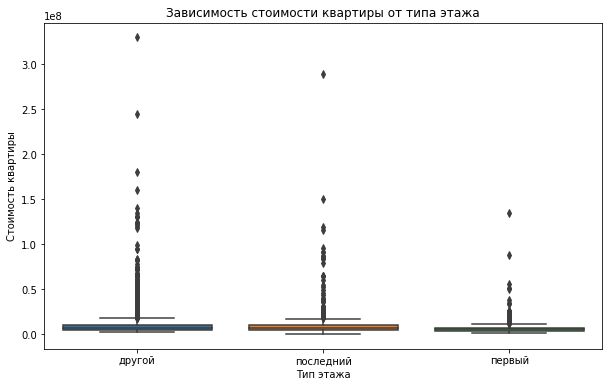

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строим boxplot для столбца last_price в зависимости от floor_type
plt.figure(figsize=(10, 6))
sns.boxplot(x='floor_type', y='last_price', data=data)
plt.title('Зависимость стоимости квартиры от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры')
plt.show()

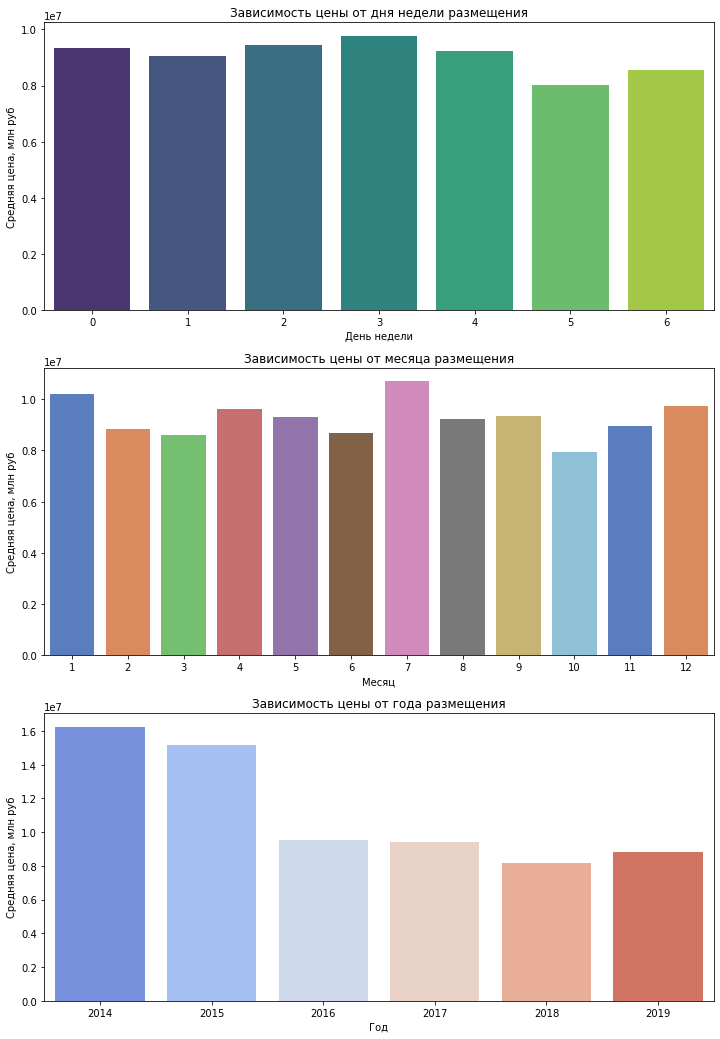

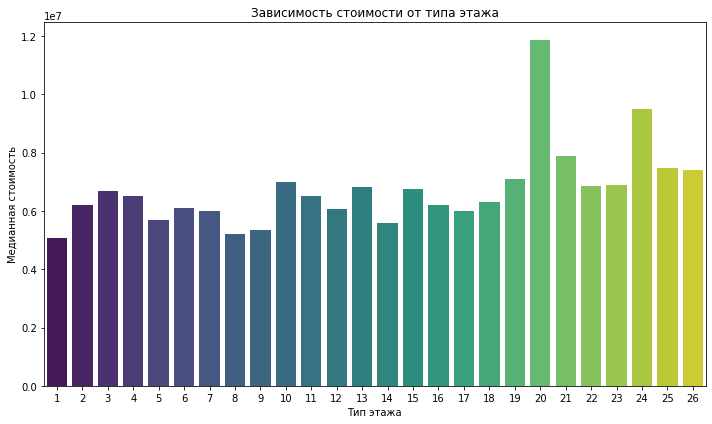

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# Преобразуем столбец с датой размещения в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Извлечем информацию о дне недели, месяце и годе размещения объявлений
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek  # день недели (0 - понедельник, 1 - вторник, и т.д.)
data['month_exposition'] = data['first_day_exposition'].dt.month  # месяц
data['year_exposition'] = data['first_day_exposition'].dt.year  # год

# Создадим сводные таблицы для анализа зависимости цены от дня недели, месяца и года размещения объявлений
price_by_weekday = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean')
price_by_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc='mean')
price_by_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc='mean')

# Построим графики зависимости цены от дня недели, месяца и года размещения объявлений
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.barplot(x=price_by_weekday.index, y='last_price', data=price_by_weekday, ax=axes[0], palette='viridis')
axes[0].set_title('Зависимость цены от дня недели размещения')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Средняя цена, млн руб')

sns.barplot(x=price_by_month.index, y='last_price', data=price_by_month, ax=axes[1], palette='muted')
axes[1].set_title('Зависимость цены от месяца размещения')
axes[1].set_xlabel('Месяц')
axes[1].set_ylabel('Средняя цена, млн руб')

sns.barplot(x=price_by_year.index, y='last_price', data=price_by_year, ax=axes[2], palette='coolwarm')
axes[2].set_title('Зависимость цены от года размещения')
axes[2].set_xlabel('Год')
axes[2].set_ylabel('Средняя цена, млн руб')

pivot_table = data.pivot_table(index='floor', values='last_price', aggfunc='median').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x='floor', y='last_price', palette='viridis')
plt.title('Зависимость стоимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Медианная стоимость')

plt.tight_layout()
plt.show()


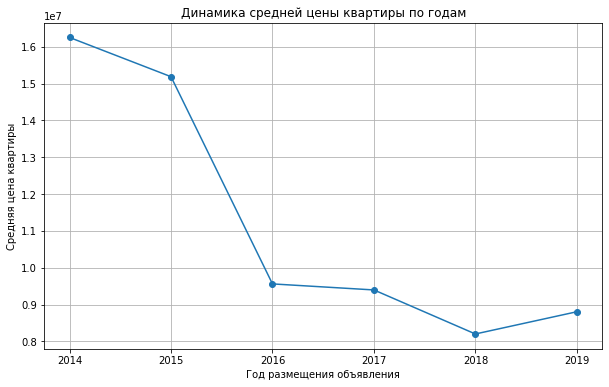

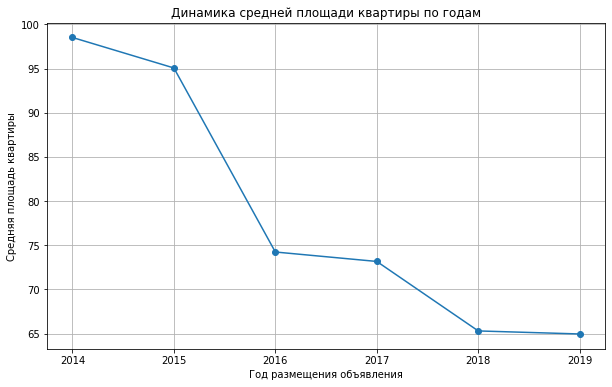

In [65]:
import matplotlib.pyplot as plt

# Создание сводной таблицы для средней цены и средней площади по годам
price_area_year = data.groupby('year_exposition').agg({'last_price': 'mean', 'total_area': 'mean'}).reset_index()

# Построение графика для цены квартиры по годам
plt.figure(figsize=(10, 6))
plt.plot(price_area_year['year_exposition'], price_area_year['last_price'], marker='o')
plt.title('Динамика средней цены квартиры по годам')
plt.xlabel('Год размещения объявления')
plt.ylabel('Средняя цена квартиры')
plt.grid(True)
plt.show()

# Построение графика для площади квартиры по годам
plt.figure(figsize=(10, 6))
plt.plot(price_area_year['year_exposition'], price_area_year['total_area'], marker='o')
plt.title('Динамика средней площади квартиры по годам')
plt.xlabel('Год размещения объявления')
plt.ylabel('Средняя площадь квартиры')
plt.grid(True)
plt.show()


In [66]:
import pandas as pd
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data['price_per_sqm'] = data['last_price'] / data['total_area']

# Определим населённые пункты с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10).index.tolist()

# Сгруппируем данные по населённым пунктам и посчитаем среднюю цену квадратного метра
locality_price_per_sqm = data[data['locality_name'].isin(top_localities)].groupby('locality_name').agg({
    'price_per_sqm': 'mean',
    'locality_name': 'size'
})

# Переименуем столбцы для ясности
locality_price_per_sqm.columns = ['mean_price_per_sqm', 'ad_count']

# Отсортируем данные по средней цене квадратного метра
locality_price_per_sqm = locality_price_per_sqm.sort_values(by='mean_price_per_sqm', ascending=False)

# Выведем сводную таблицу с результатами
print(locality_price_per_sqm)

# Найдем населённые пункты с самой высокой и самой низкой стоимостью квадратного метра
highest_price_locality = locality_price_per_sqm.index[0]
lowest_price_locality = locality_price_per_sqm.index[-1]

print(f"Населённый пункт с самой высокой стоимостью квадратного метра: {highest_price_locality}")
print(f"Населённый пункт с самой низкой стоимостью квадратного метра: {lowest_price_locality}")


                 mean_price_per_sqm  ad_count
locality_name                                
санкт-петербург       120370.370370         1
зеленогорск           112903.225806         1
павловск              108910.891089         1
петергоф               82943.925234         1
кронштадт              81818.181818         1
Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург
Населённый пункт с самой низкой стоимостью квадратного метра: кронштадт


In [71]:
cleaned_data = data.dropna(subset=['cityCenters_nearest'])

spb_flats = cleaned_data[cleaned_data['locality_name'] == 'Санкт-Петербург']

spb_flats['city_center_distance_km'] = (spb_flats['cityCenters_nearest'] / 1000).round().astype('Int64')

mean_price_by_distance = spb_flats.groupby('city_center_distance_km')['last_price'].mean()

if not mean_price_by_distance.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(mean_price_by_distance.index, mean_price_by_distance.values, marker='o', linestyle='-')
    plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
    plt.xlabel('Расстояние до центра, км')
    plt.ylabel('Средняя цена, млн руб.')
    plt.grid(True)

    # Проверяем значения индексов и создаём корректный диапазон для xticks
    x_min = int(mean_price_by_distance.index.min())
    x_max = int(mean_price_by_distance.index.max())
    plt.xticks(np.arange(x_min, x_max + 1, 1))  # Генерация целых значений для xticks

    plt.show()
else:
    print("Нет данных для построения графика.")


Нет данных для построения графика.


<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️

Верно. На графике после 7 км заметно, что цена меняется. Это возможный центр города.

Если интересно, то самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной.
Для географической справки: https://zen.yandex.ru/media/id/5cb4ebcc0a51a300b5b1f60d/zolotoi-treugolnik-sanktpeterburga-chto-eto-i-gde-nahoditsia-5edf942db1204610073e88b2

</div>

### Напишите общий вывод

Итак, параметры, влияющие на цены объектов.
Прежде всего, на все объекты влияет площадь помещения. Пиковые значения приходятся на объекты, площадь которых составляет 35-50 кв.м.
Также жилая площадь тоже влияет на фактор ценообразования. Так, согласно графику, от 15 до 40 кв.м. приходятся самыми часто-покупаемыми среди остальных.
Площадь кухни не является популярным фактором, однако среди тех, кто выбирает площадь кухни, те выбирают площадь от 5 до 10 кв. м.
Также факторы влияющие на цены объектов является количество комнат и этажи (не первый и не последний).
Необходимо обратить внимание на этажность дома, поскольку 5 и 10 этажные дома имеют преимущество перед другими домами, согласно графику.
Большинство покупателей обращает внимание на расстояние до центра. Так подавляющее большинство выбирает расстояние до центра ~10-12 км, в то время как расположенность парков им важнее. Большинство выбирает расстояние до парков 500 м. 